## 학습 곡선 해석하기
- 최적화 학습 곡선 : Loss
- 성능 학습 곡선 : Accuracy

<Loss 기준>
1. Underfitting
2. Overfitting
3. good
4. Data representation

### 1. Underfitting

#### 1.1 학습 자체가 잘 안되고 있는 경우 
- train loss도 제대로 줄어들지 않고 있다. 
- 마찬가지로 valid loss도 그렇고 이 둘 사이에 큰 격차가 존재한다. 

![underfit_1](http://drive.google.com/uc?id=1s_VJETIK5pnIZ6hR52myJ0wXfVnMl_ID)

#### 1.2 학습량이 부족한 경우 

- train loss 및 valid loss가 계속해서 감소하고 있다. 
- 이 경우 더 학습하거나 learing_rate를 증가시키는 것이 방법이 될 수 있다. 

![upderfit_2](http://drive.google.com/uc?id=13wfsbD5vPtO6ZTkmPtMbl5CKj5CSXSlN)

### 2. Overfitting

- train loss가 계속 줄어드는 반면, valid loss는 어느 순간부터 다시 올라감
- train과 valid의 loss 그래프가 상당히 울퉁불퉁함

![overfit_1](http://drive.google.com/uc?id=1-qyw-S29UQvvqBH1xoaSCElCihqio7CL)

### 3. 좋은 학습 곡선
- 학습 곡선이 둘 다 안정적인 곳으로 수렴함
- train loss와 valid loss의 간격이 최소
- 일반화 오차에 의해 조금의 차이가 있음
- 그래프가 비교적 평탄함

![good](http://drive.google.com/uc?id=1a-liauiYTutuqueR-7OZp2ZZvy7dwan-)

### 4. Data Representation

#### 4.1 train 데이터에 대표성이 없는 경우 
- 개선이 되는 거 같긴 하지만 train loss와 valid loss에 상당한 격차가 보임
- 일반적으로 valid set에 비해 train set이 적은 경우에 빈번하게 발생

![train_data_leakage](http://drive.google.com/uc?id=1ScOcHAf2j5-54edQwgDXjyVhHbAPqZXr)

#### 4.2 valid 데이터에 대표성이 없는 경우 

- train loss는 적합하나 valid loss가 매우 불안정함

![valid_data_leakage](http://drive.google.com/uc?id=1RaR5VpZP8iILNbOsrH0agHLBBMQCLUeN)

- 검증 데이터가 훈련 데이터보다 예측이 더 쉬운 경우 

![valid_data_leakage_2](http://drive.google.com/uc?id=1x44_hWtZ_KAT8EDZjixJ1Jq63XP2HDR1)

# 학습 곡선을 이용해 Overfitting을 판단하는 예시(feat.반례)

In [ ]:
# synthetic classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


In [ ]:
# split a dataset into train and test sets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


In [ ]:
# define the tree depths to evaluate
values = [i for i in range(1, 21)]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# evaluate a decision tree for each depth
train_scores = []
test_scores = []
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.761, test: 0.769
>2, train: 0.802, test: 0.807
>3, train: 0.870, test: 0.872
>4, train: 0.905, test: 0.896
>5, train: 0.921, test: 0.910
>6, train: 0.934, test: 0.919
>7, train: 0.944, test: 0.928
>8, train: 0.950, test: 0.924
>9, train: 0.960, test: 0.921
>10, train: 0.969, test: 0.919
>11, train: 0.977, test: 0.921
>12, train: 0.983, test: 0.916
>13, train: 0.987, test: 0.913
>14, train: 0.990, test: 0.916
>15, train: 0.993, test: 0.916
>16, train: 0.996, test: 0.913
>17, train: 0.997, test: 0.915
>18, train: 0.998, test: 0.908
>19, train: 0.999, test: 0.910
>20, train: 0.999, test: 0.910


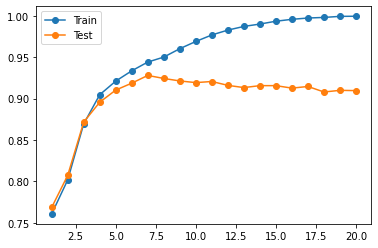

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

>1, train: 0.768, test: 0.760
>2, train: 0.809, test: 0.799
>3, train: 0.874, test: 0.866
>4, train: 0.905, test: 0.892
>5, train: 0.916, test: 0.903
>6, train: 0.929, test: 0.913
>7, train: 0.944, test: 0.924
>8, train: 0.953, test: 0.923
>9, train: 0.963, test: 0.923
>10, train: 0.969, test: 0.916
>11, train: 0.977, test: 0.917
>12, train: 0.983, test: 0.914
>13, train: 0.986, test: 0.916
>14, train: 0.990, test: 0.913
>15, train: 0.992, test: 0.915
>16, train: 0.995, test: 0.910
>17, train: 0.997, test: 0.907
>18, train: 0.998, test: 0.913
>19, train: 0.998, test: 0.911
>20, train: 0.998, test: 0.908


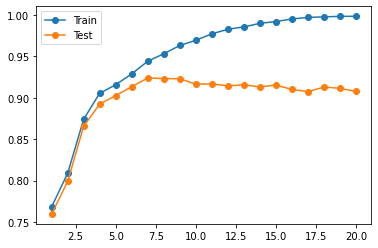

In [ ]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

>1, train: 1.000, test: 0.921
>2, train: 0.962, test: 0.918
>3, train: 0.960, test: 0.934
>4, train: 0.954, test: 0.936
>5, train: 0.953, test: 0.938
>6, train: 0.951, test: 0.940
>7, train: 0.949, test: 0.939
>8, train: 0.948, test: 0.937
>9, train: 0.947, test: 0.937
>10, train: 0.947, test: 0.936
>11, train: 0.944, test: 0.937
>12, train: 0.945, test: 0.937
>13, train: 0.942, test: 0.935
>14, train: 0.943, test: 0.934
>15, train: 0.942, test: 0.936
>16, train: 0.941, test: 0.936
>17, train: 0.940, test: 0.936
>18, train: 0.940, test: 0.935
>19, train: 0.940, test: 0.938
>20, train: 0.940, test: 0.938
>21, train: 0.939, test: 0.939
>22, train: 0.939, test: 0.938
>23, train: 0.938, test: 0.938
>24, train: 0.939, test: 0.936
>25, train: 0.937, test: 0.938
>26, train: 0.937, test: 0.936
>27, train: 0.937, test: 0.936
>28, train: 0.937, test: 0.937
>29, train: 0.937, test: 0.937
>30, train: 0.936, test: 0.936
>31, train: 0.937, test: 0.937
>32, train: 0.937, test: 0.935
>33, train: 0.935

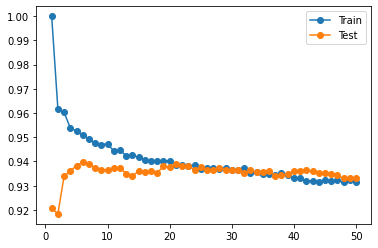

In [ ]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

결론 : 학습 곡선은 Overfitting을 감지하고 싶을 때 아주 유용한 방법이다. 
하지만 알고리즘 작동방식에 따라 학습곡선이 의미가 없을 떄도 있다. 
중요한 건 train 외 샘플의 score로 모델을 선택해야 한다는 것이다. 
하지만 이것도 함정은 있다. 다양한 하이퍼파라미터를 그리드/랜덤/베이지안 서치를 해서 valid score를 얻고 이것들을 비교해서 적합한 하이퍼파라미터를 찾는 방식은
어쩌면 운이 작용하고 있을 수도 있다. 하지만 이 경우 선택된 하이퍼파라미터의 valid score가 당연히 가장 높은게 선택되겠지만 train에서 과적합되고 있는 경우가 있을 지 모른다. 이 경우 과적합 지점 전에 짤라주는 것이 일반화에 더 도움이 될 것이다.

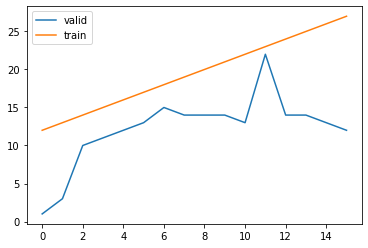

In [ ]:
x = range(len(y))
y = [1,3,10,11,12,13,15,14,14,14,13,22,14,14,13,12]
pyplot.plot(x,y, label = 'valid')
pyplot.plot(x, range(12,11 + len(y)+1,1), label = 'train')
pyplot.legend()